## Download necessary libraries

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=1ec427bf0ca9e58964e34eaab06cb2a797427c78edfb6a0942dfe4a05775adef
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [39]:
# List of NLTK data packages to download
nltk_packages = ['punkt', 'wordnet', 'stopwords']

# Download each package
for package in nltk_packages:
    nltk.download(package)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Network Analysis and Community Detection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


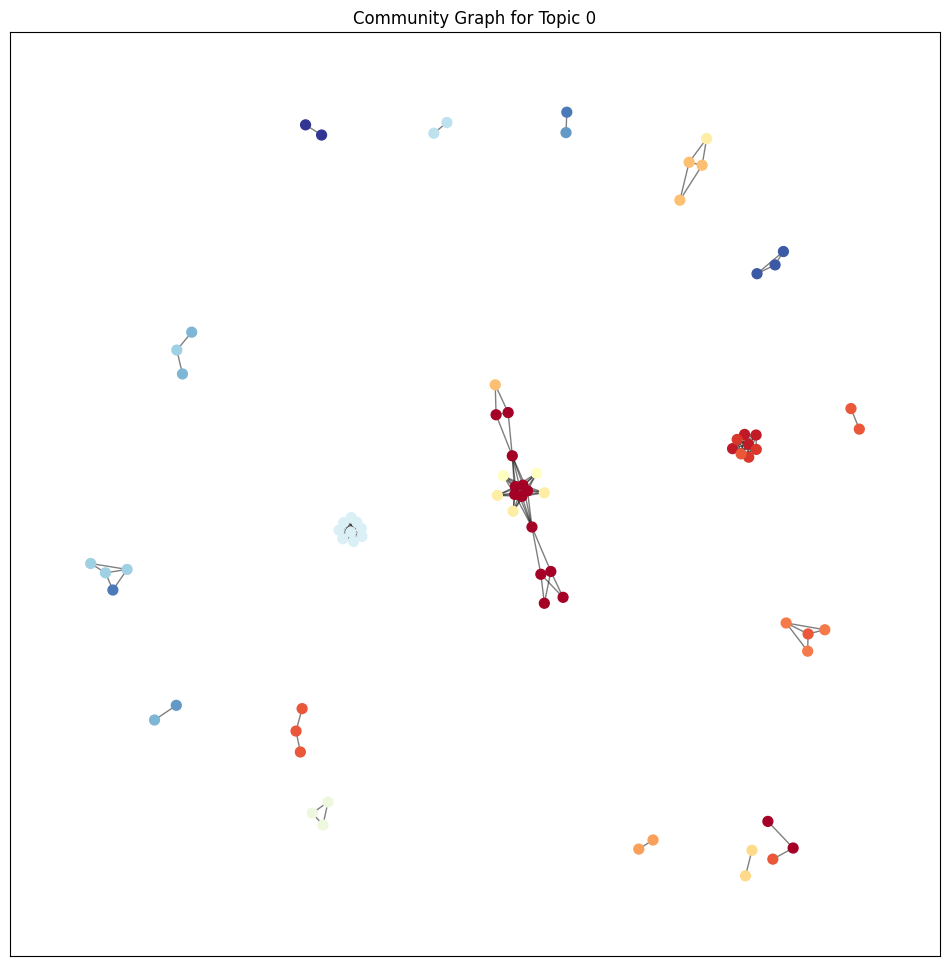

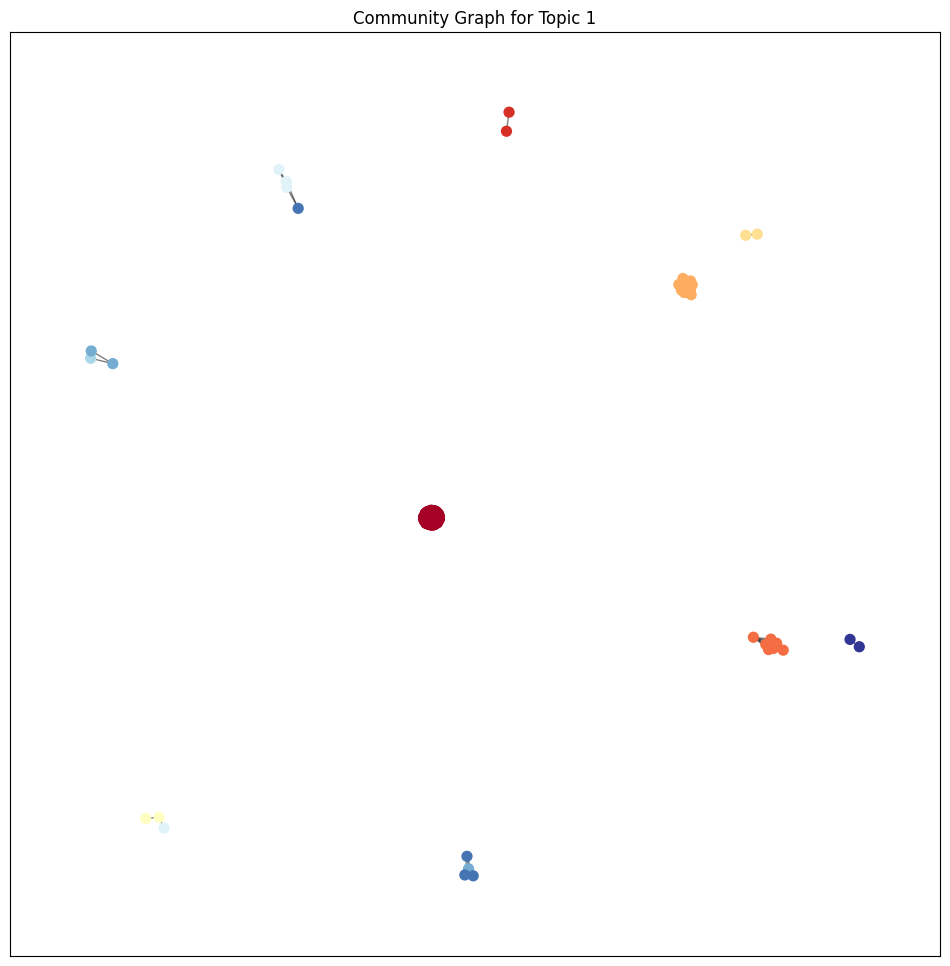

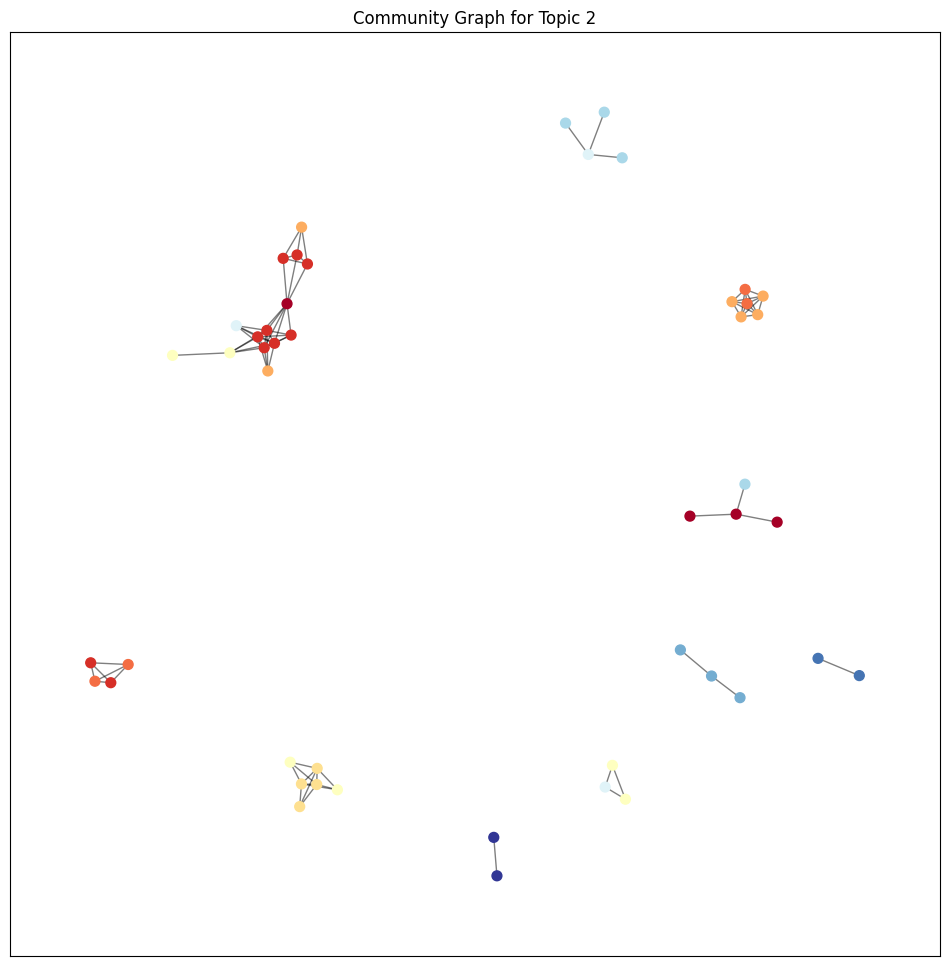

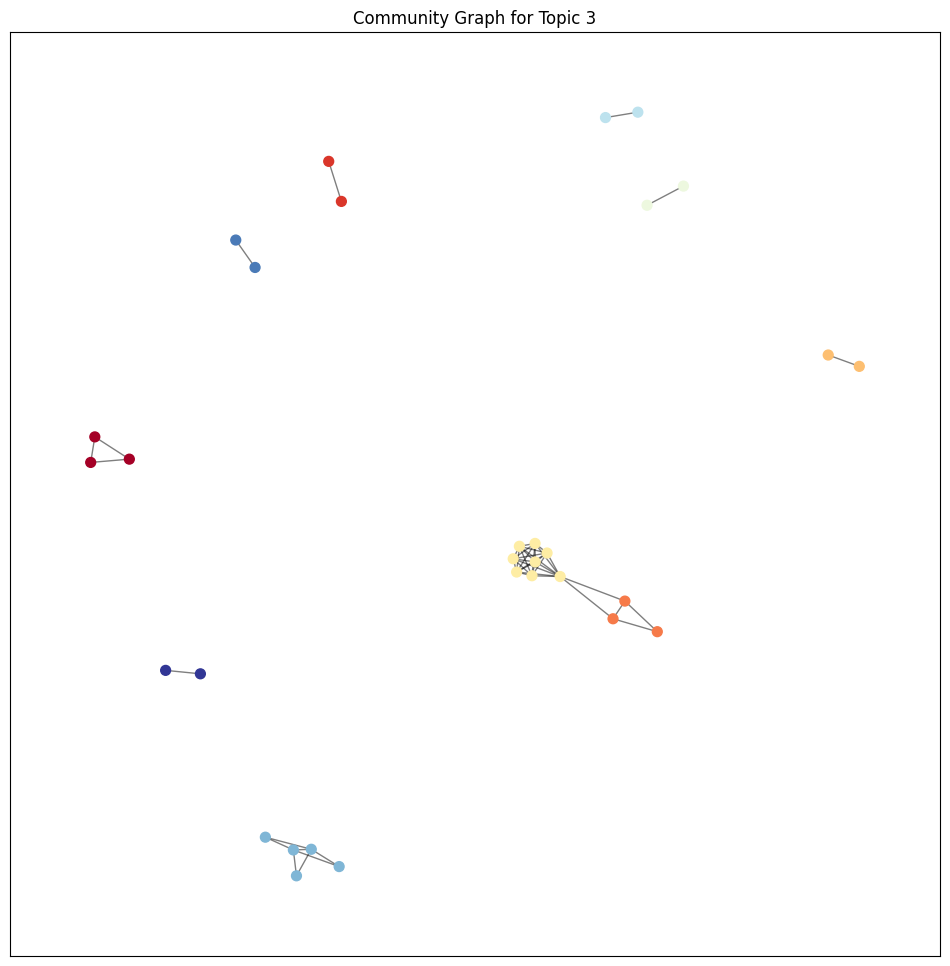

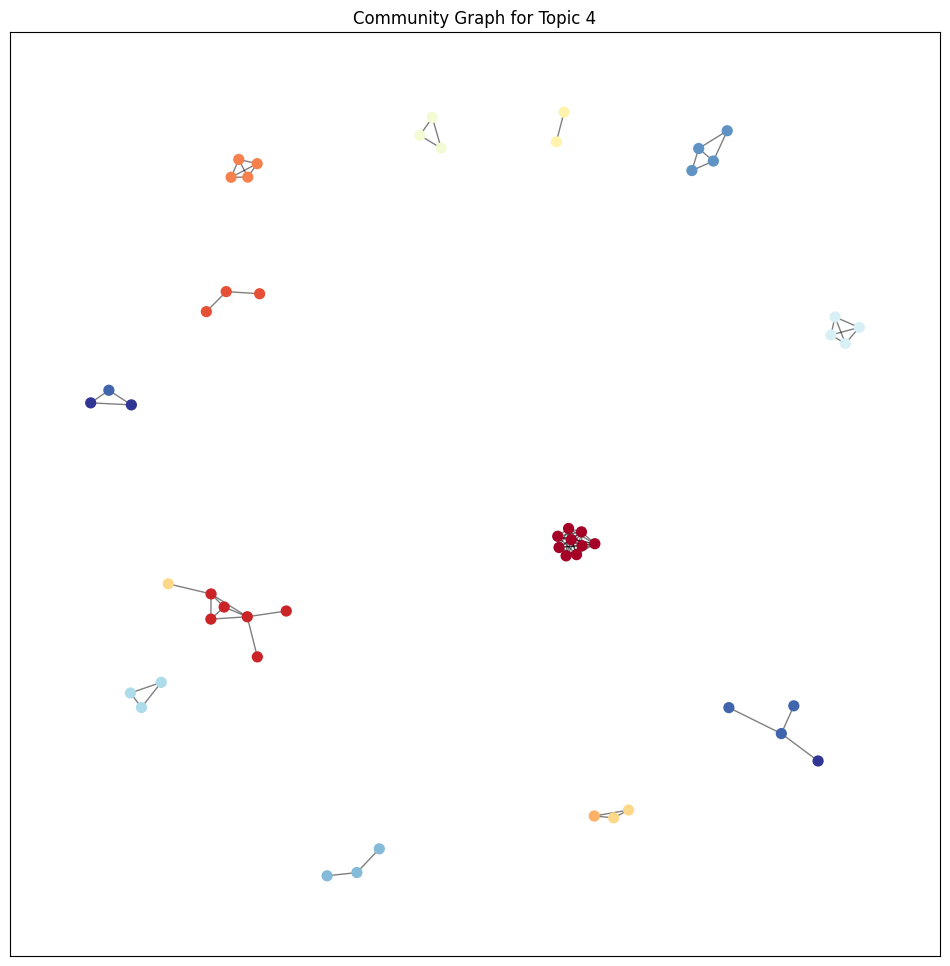

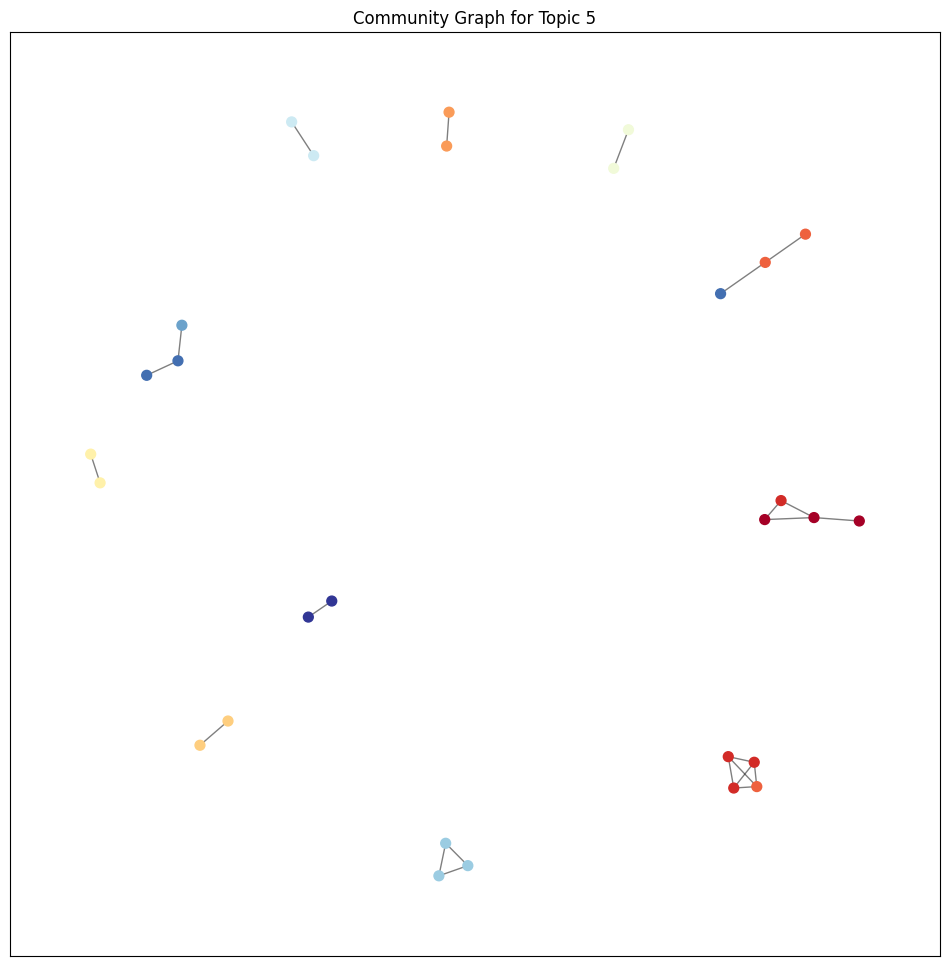

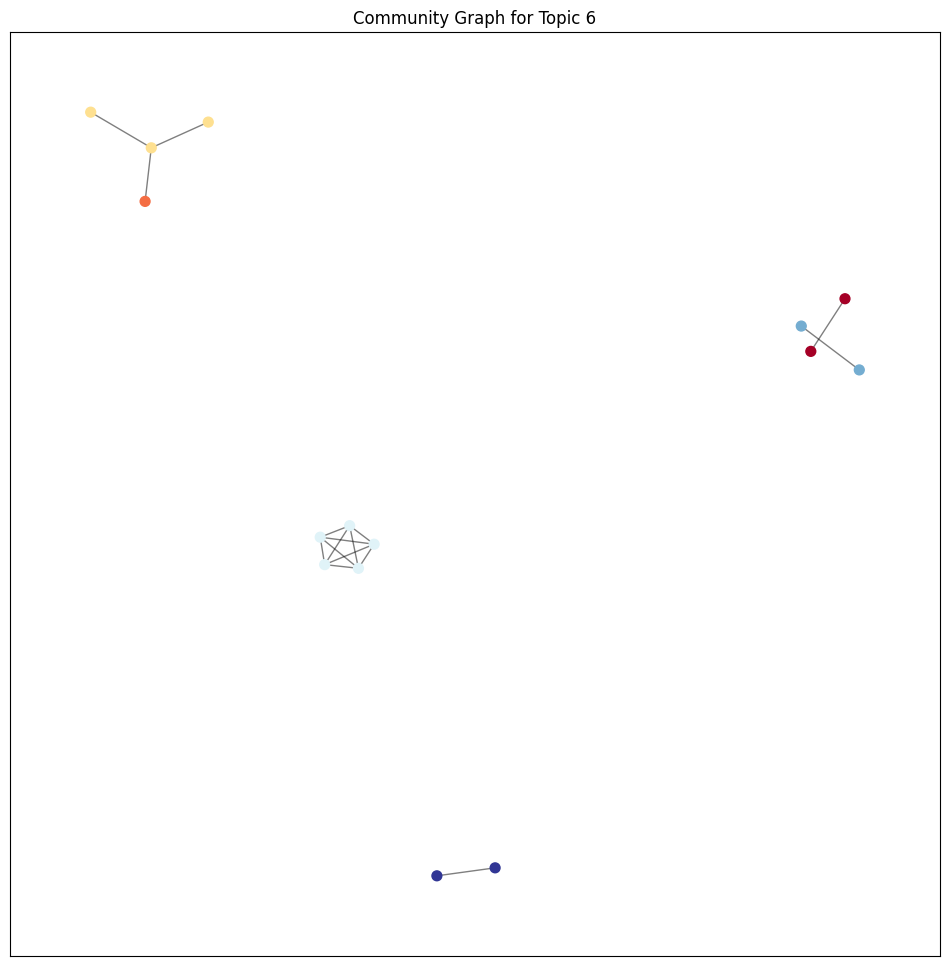

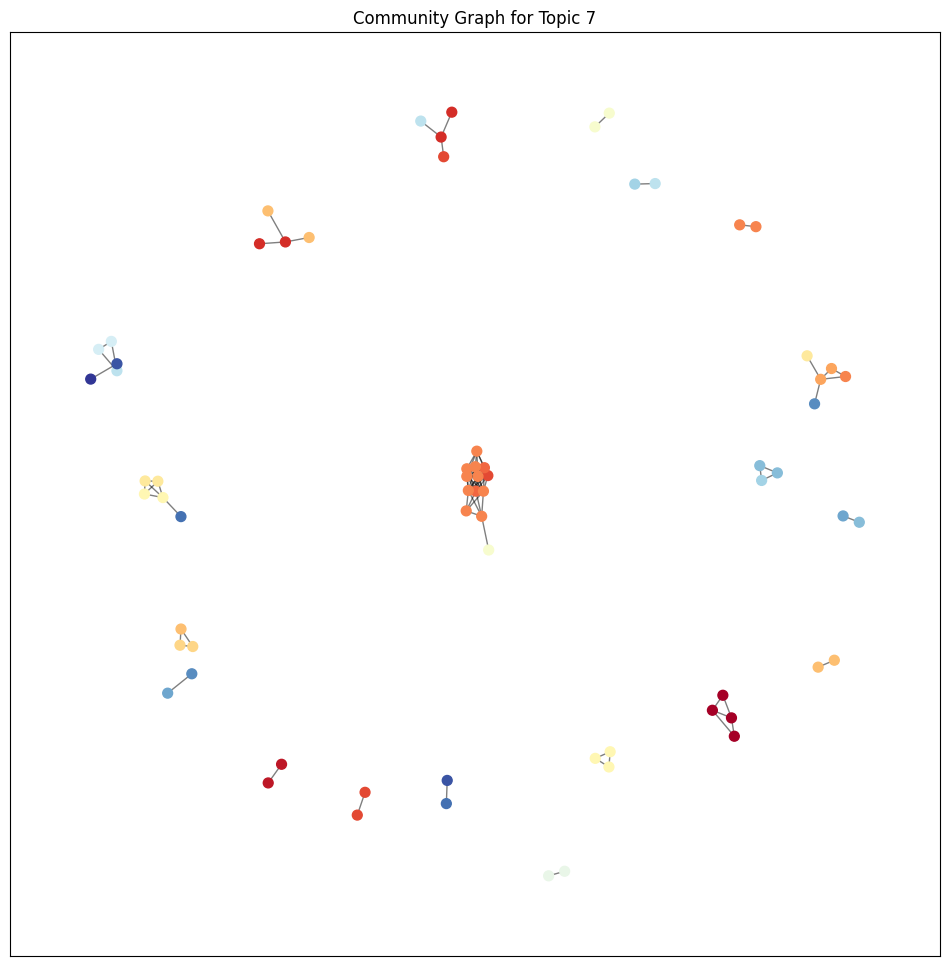

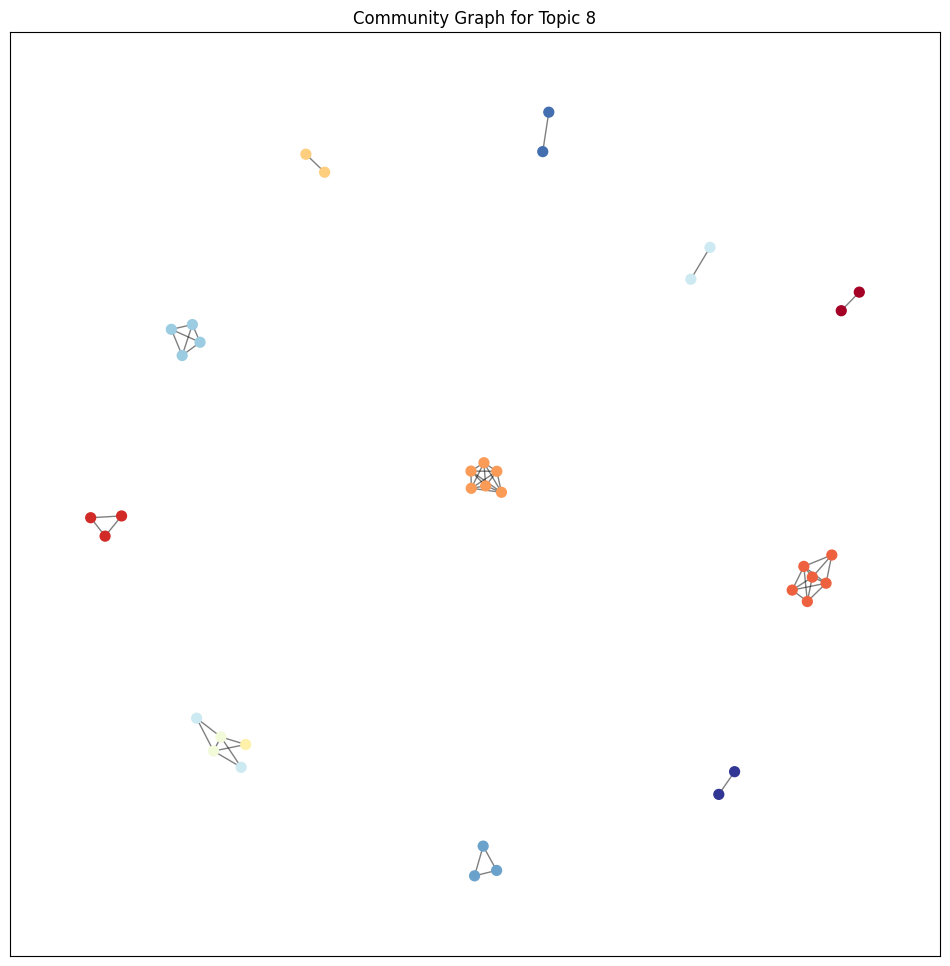

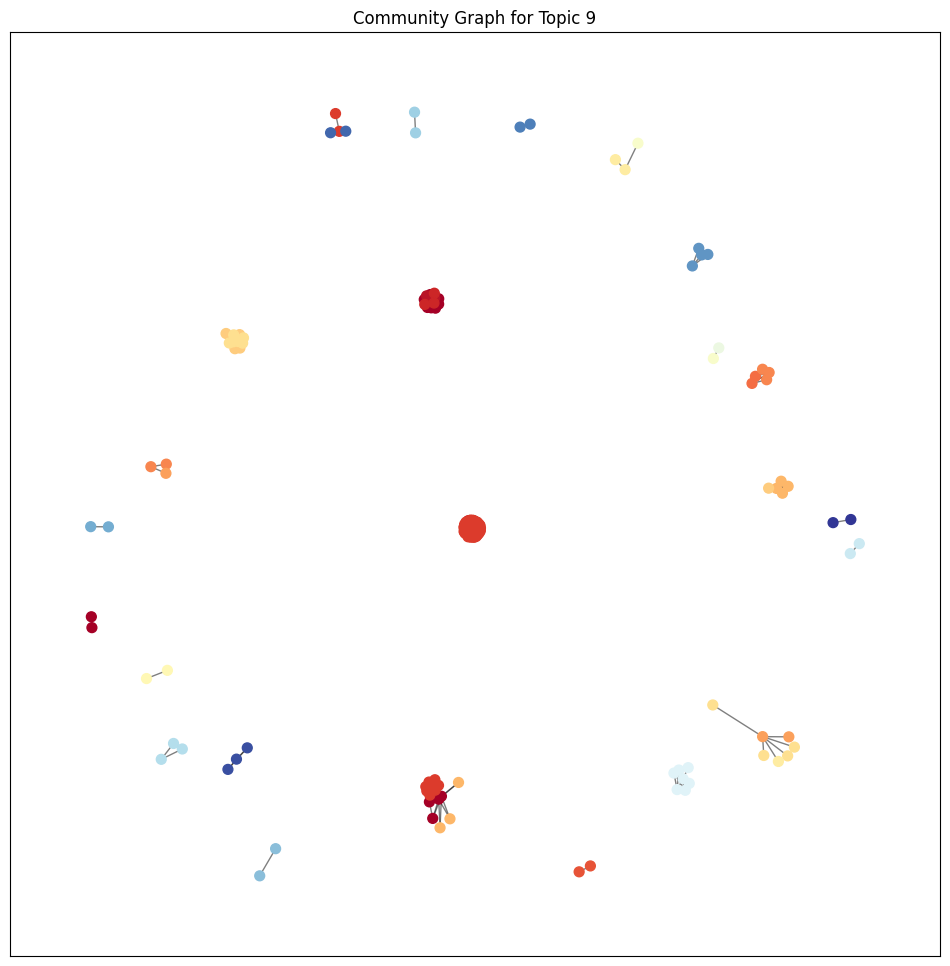

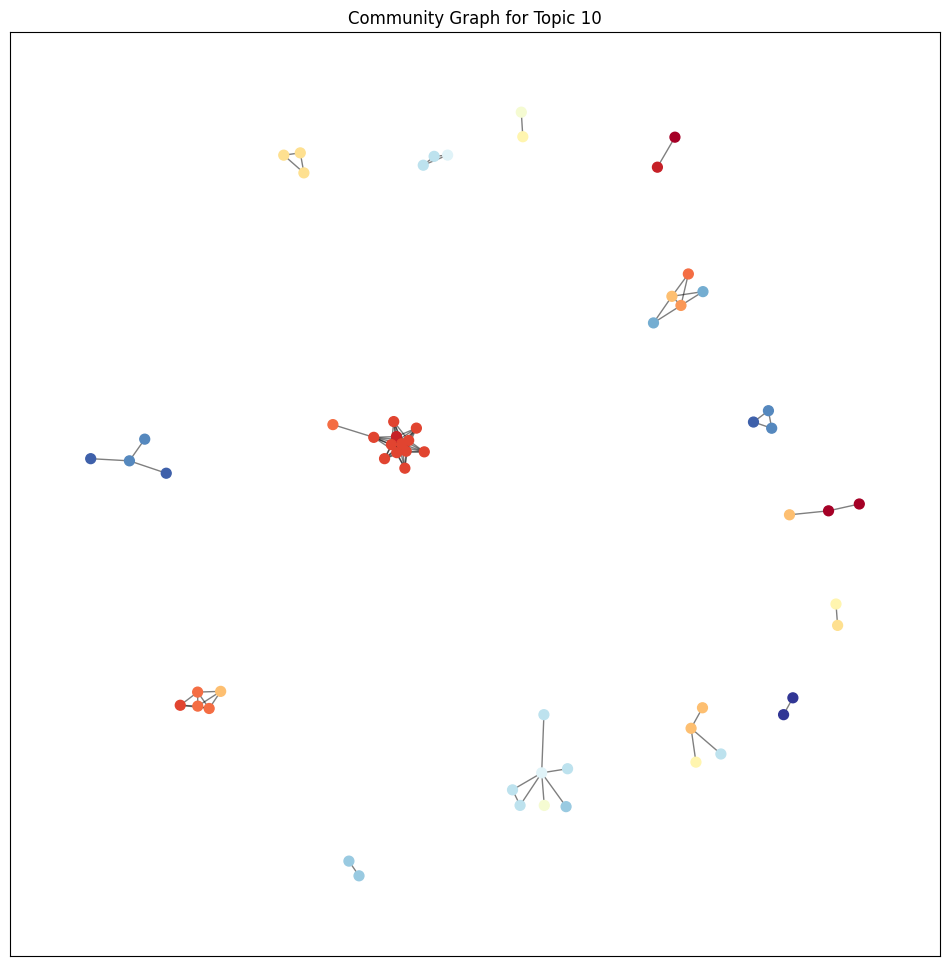

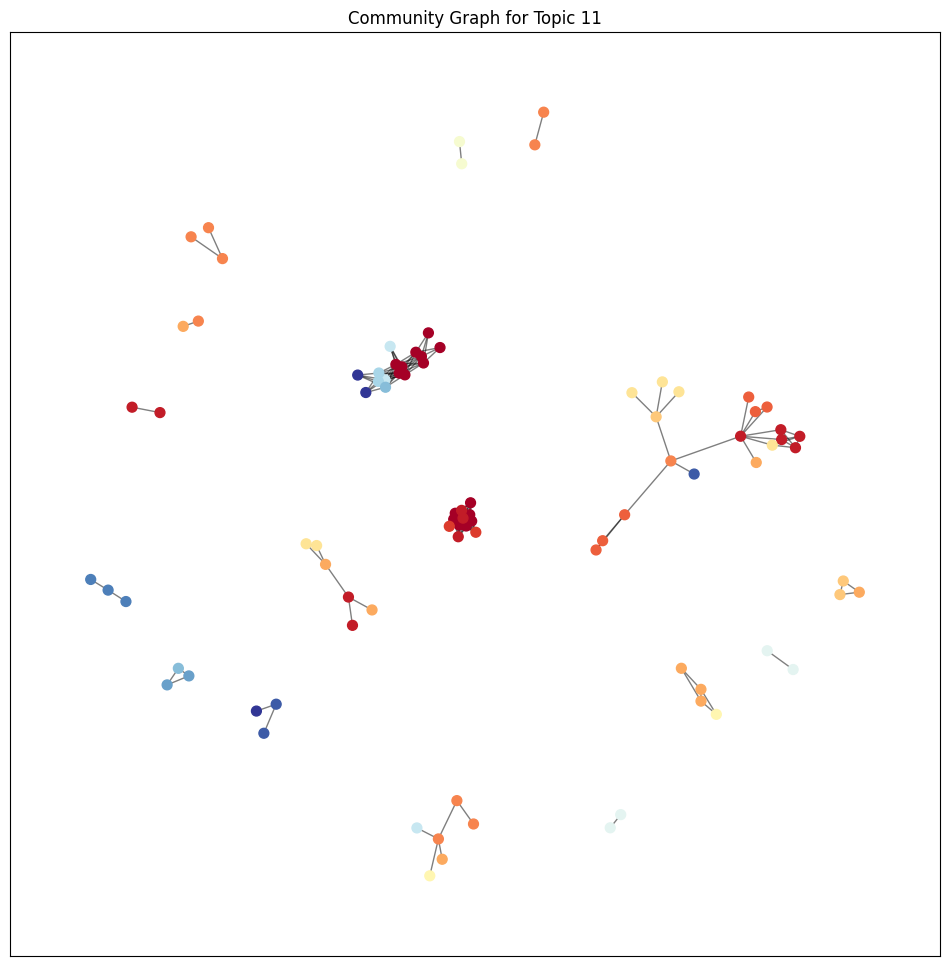

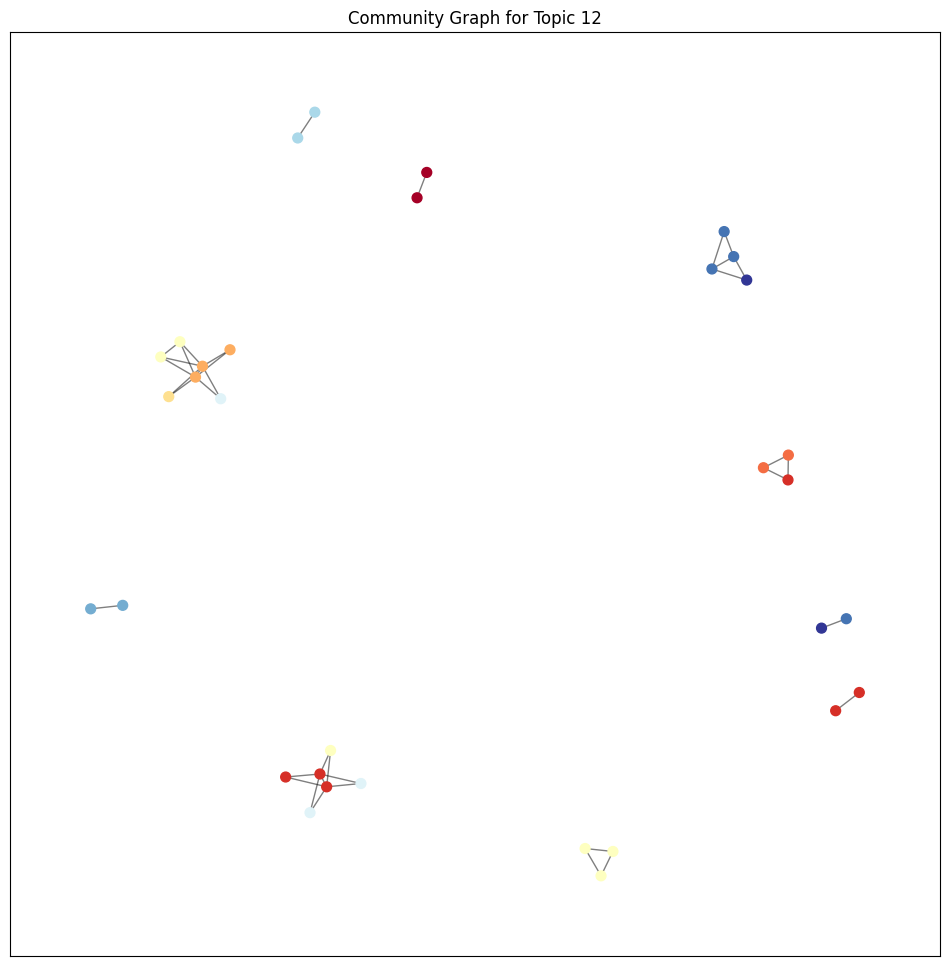

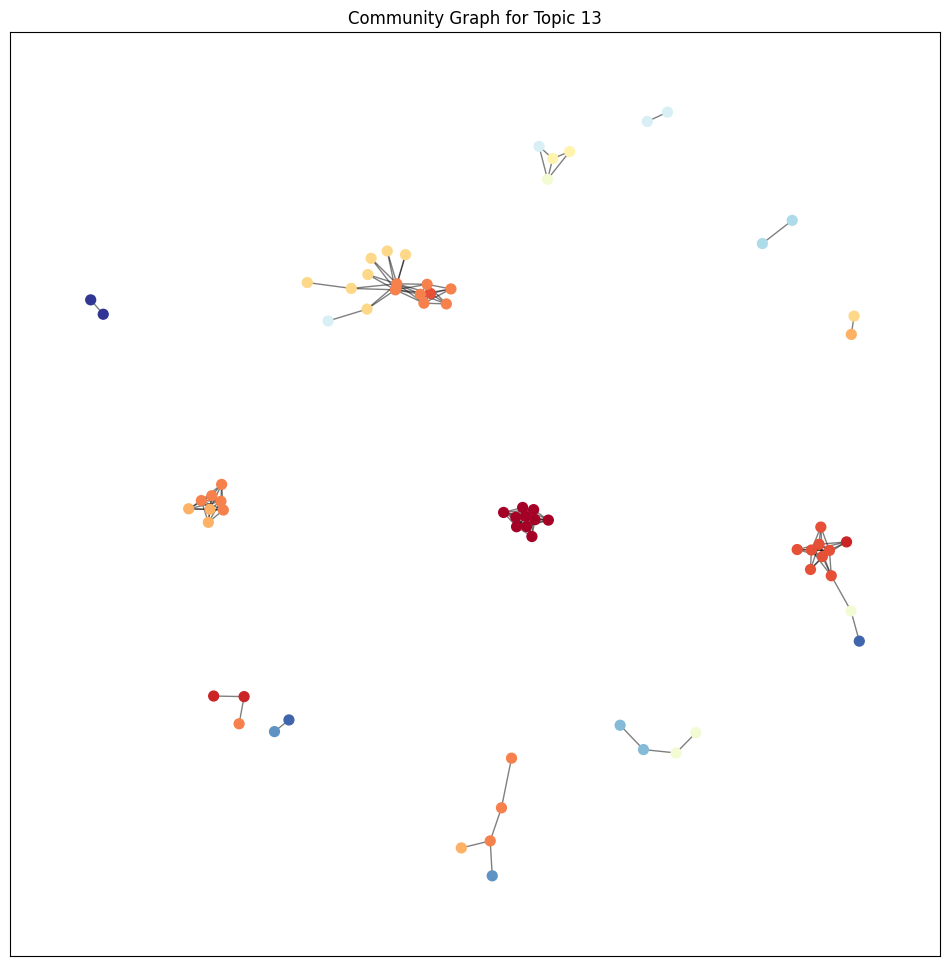

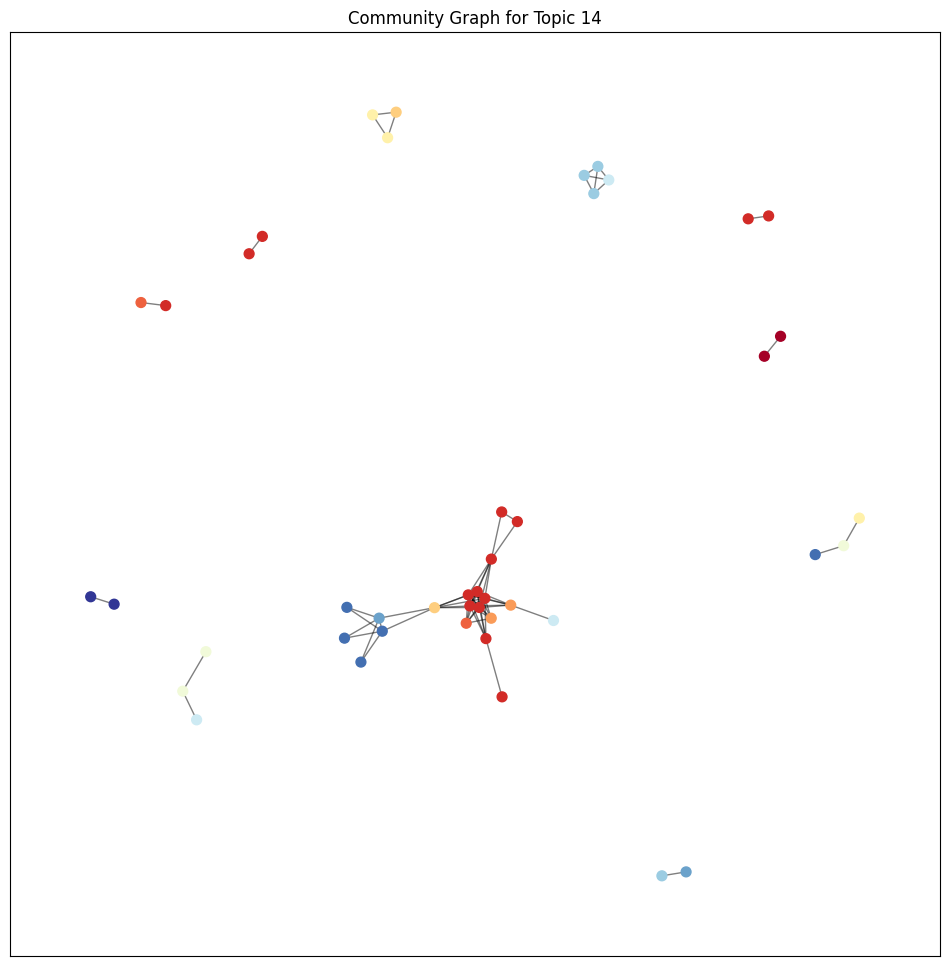

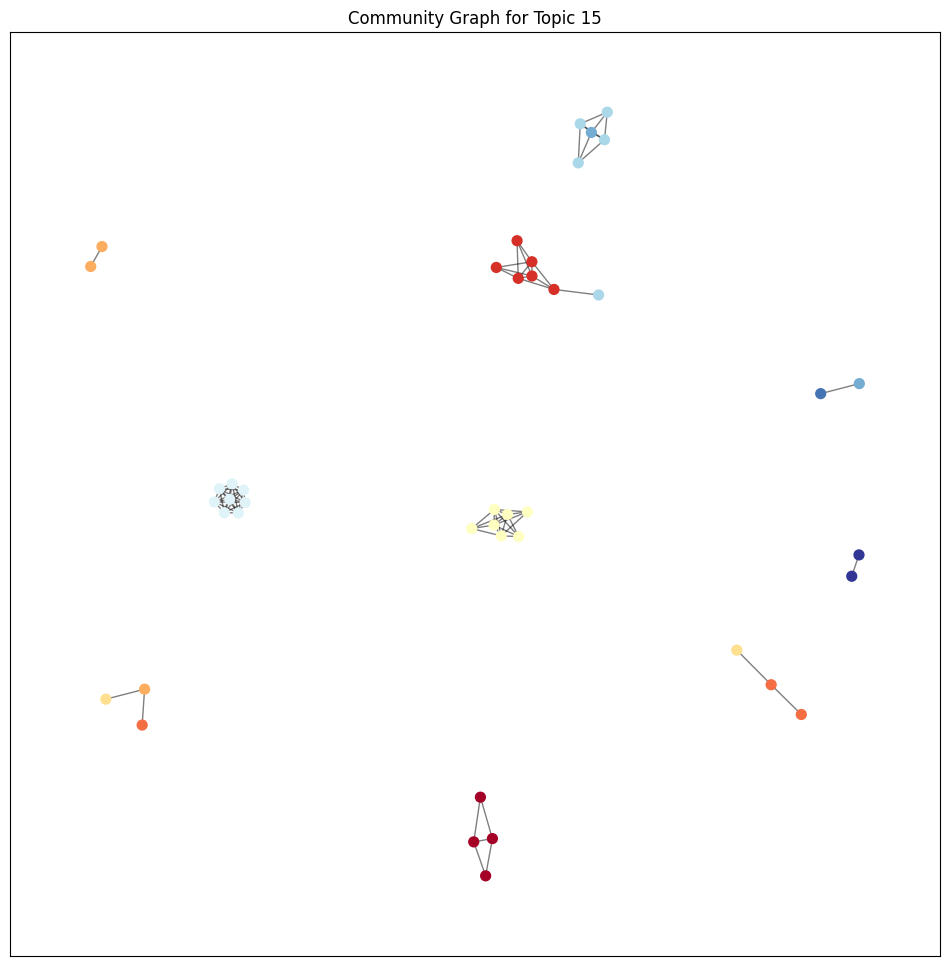

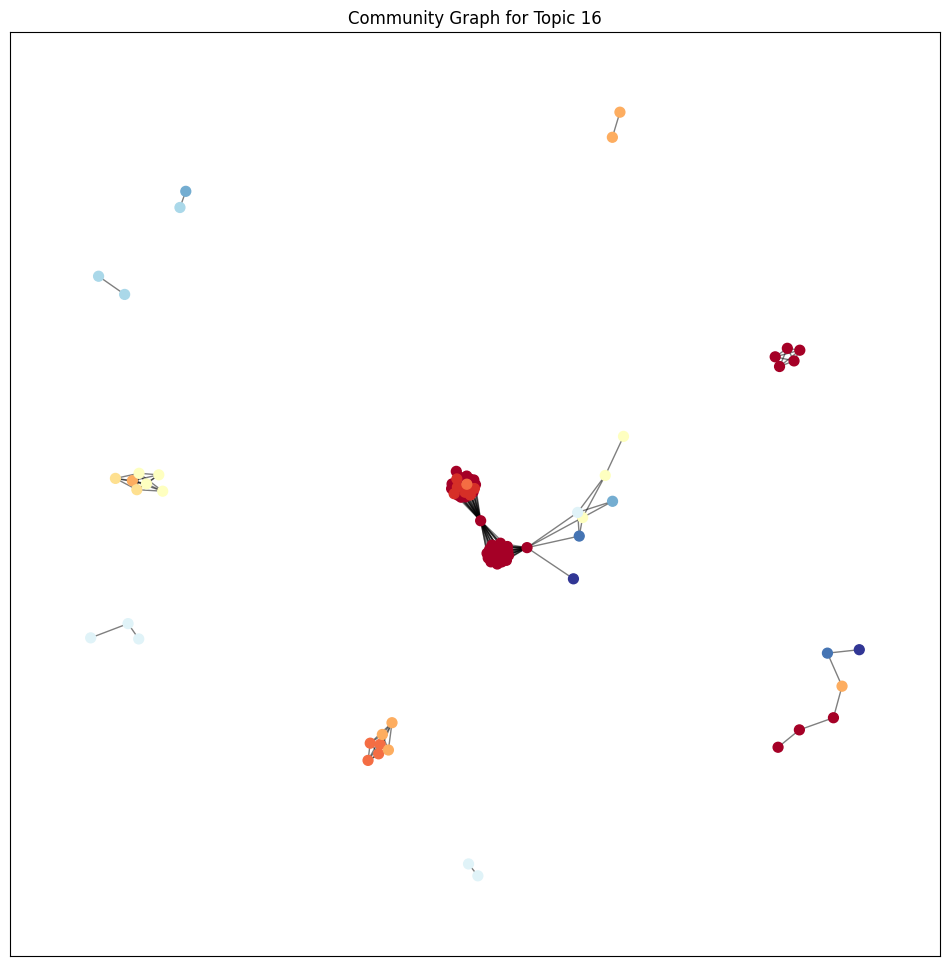

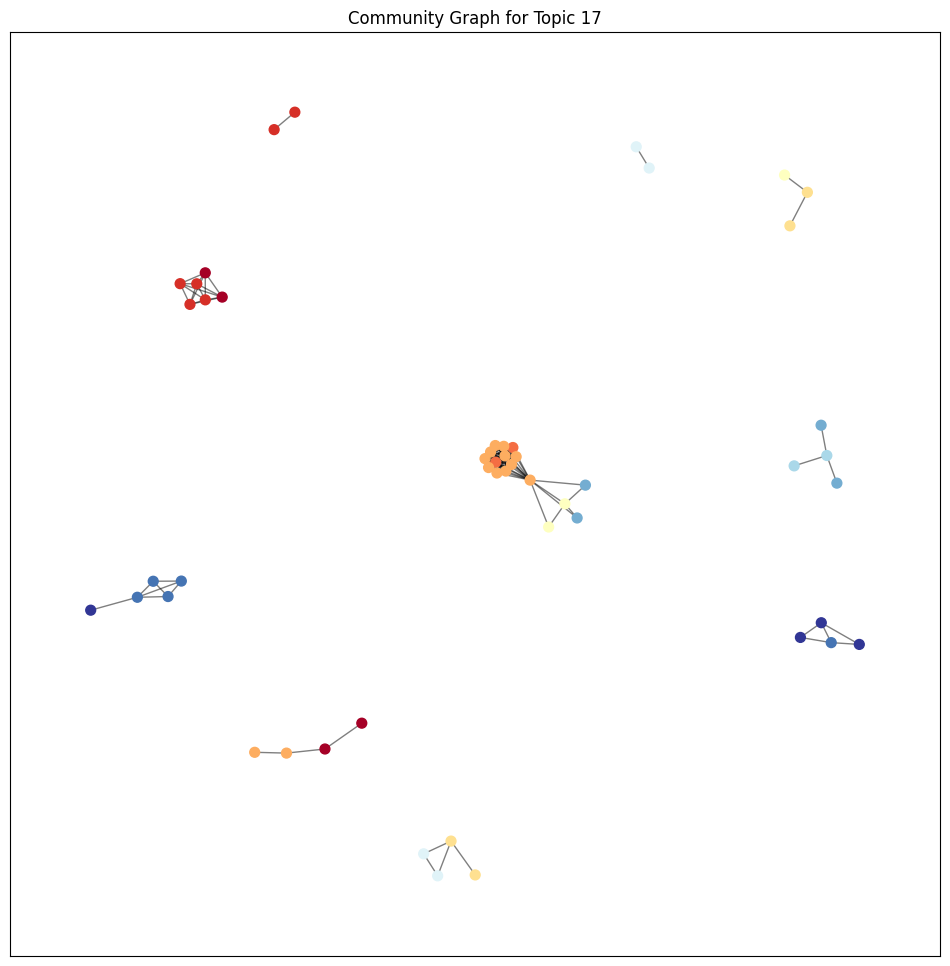

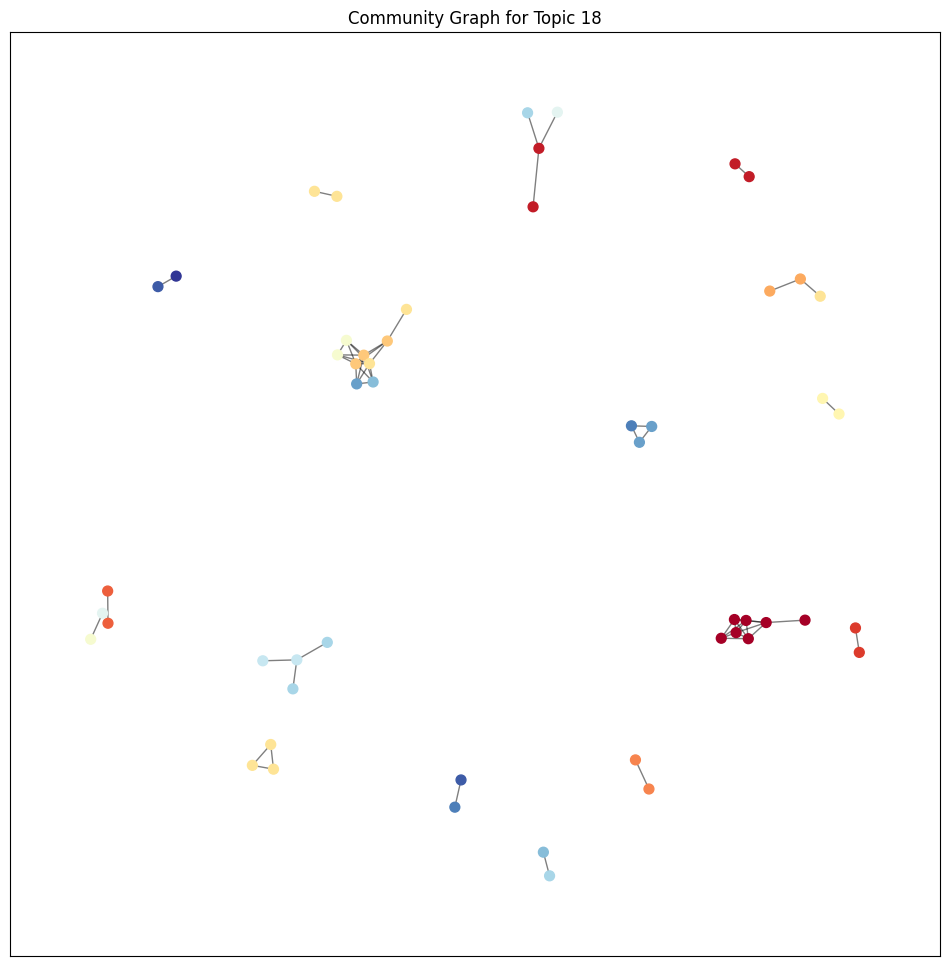

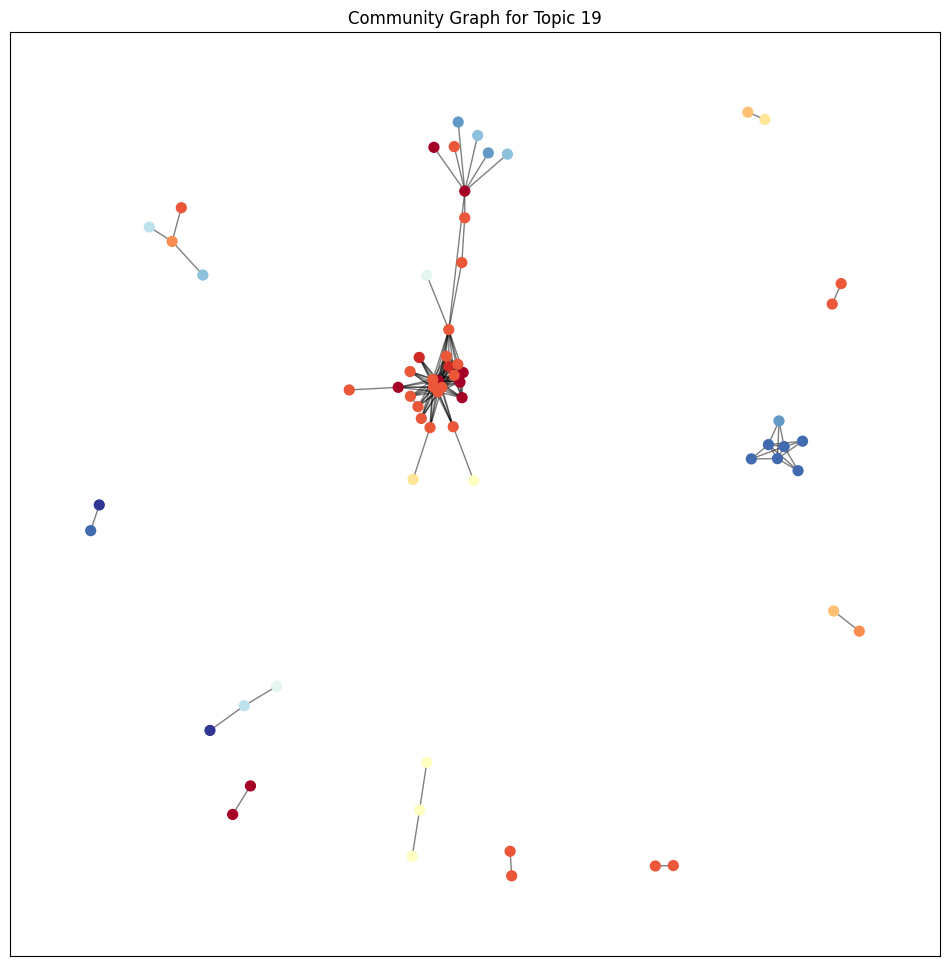

In [57]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import community
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Read the CSV file
topic_docs_df = pd.read_csv('reddit_topic_documents.csv')

# Iterate over each topic and perform community analysis
for topic_idx in topic_docs_df['Topic'].unique():
    related_docs = topic_docs_df[topic_docs_df['Topic'] == topic_idx]['Document'].tolist()

    # Perform community analysis
    # Step 1: Vectorize the related documents using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(related_docs)

    # Step 2: Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(tfidf_matrix)

    # Step 3: Create a graph from the cosine similarity matrix
    G = nx.Graph()
    for i in range(len(related_docs)):
        for j in range(i + 1, len(related_docs)):
            if cosine_sim_matrix[i, j] > 0.5:
                G.add_edge(i, j, weight=cosine_sim_matrix[i, j])

    # Step 4: Detect communities using the Girvan-Newman method
    communities_generator = community.girvan_newman(G)  # Call girvan_newman directly from the community module
    top_level_communities = next(communities_generator)
    sorted_communities = sorted(map(sorted, top_level_communities))


    # Export the graph to a GEXF file for Gephi
    nx.write_gexf(G, f"reddit_document_similarity_graph_topic_{topic_idx}.gexf")

    # Plot the graph using matplotlib
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.RdYlBu, node_color=[idx for idx, community in enumerate(sorted_communities) for _ in community])
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(f"Community Graph for Topic {topic_idx}")
    plt.savefig(f"reddit_document_similarity_graph_topic_{topic_idx}.png")  # Save the graph as an image
    plt.show()

## Combine the topics to get meaningful results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


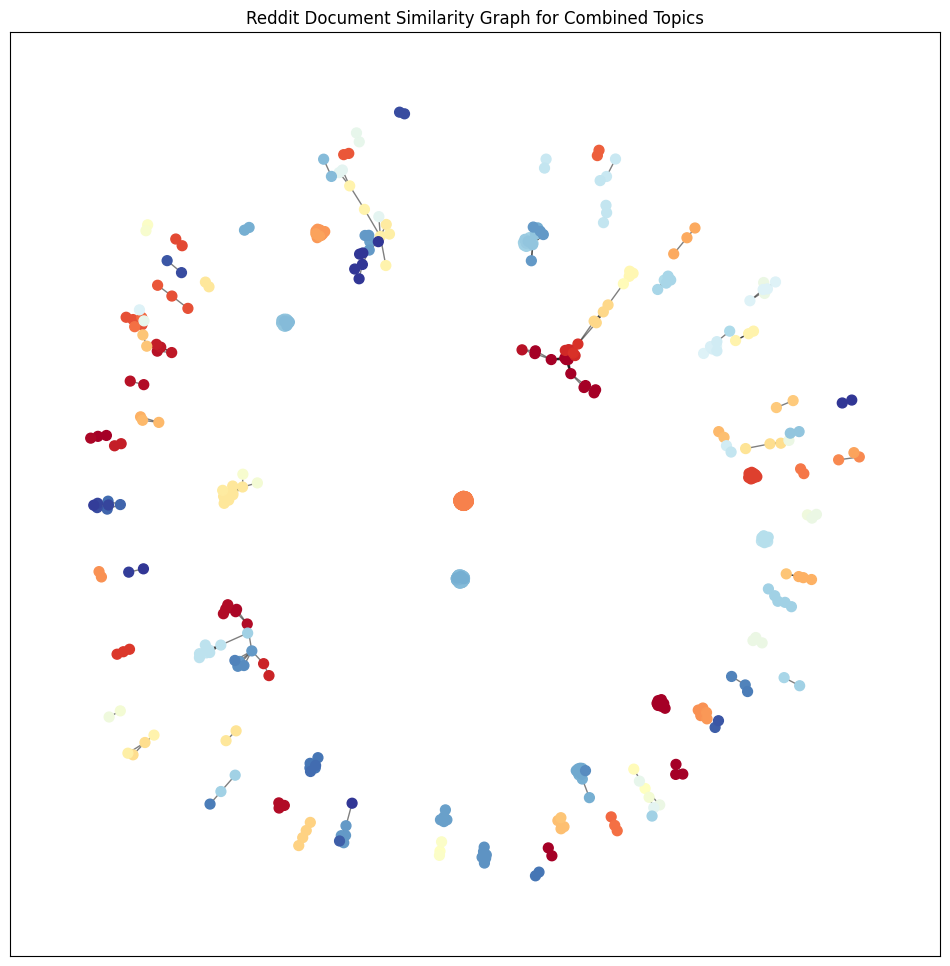

In [55]:

# Define the topics of interest
topics_of_interest = [0, 1, 7, 15, 9]

# Extract and combine documents related to the specified topics
combined_docs = []
for topic_idx in topics_of_interest:
    related_docs = topic_docs_df[topic_docs_df['Topic'] == topic_idx]['Document'].tolist()
    combined_docs.extend(related_docs)

# Perform community analysis on the combined documents
# Step 1: Vectorize the combined documents using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(combined_docs)

# Step 2: Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 3: Create a graph from the cosine similarity matrix
G = nx.Graph()
for i in range(len(combined_docs)):
    for j in range(i + 1, len(combined_docs)):
        if cosine_sim_matrix[i, j] > 0.5:
            G.add_edge(i, j, weight=cosine_sim_matrix[i, j])

# Step 4: Detect communities using the Louvain method
partition = community.louvain_communities(G)  # Call louvain_communities directly from the community module


# Export the graph to a GEXF file for Gephi
nx.write_gexf(G, "reddit_combined_document_similarity_graph.gexf")

# Visualize the graph and save it as an image
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.RdYlBu, node_color=[idx for idx, community in enumerate(partition) for _ in community])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Reddit Document Similarity Graph for Combined Topics")
plt.savefig("reddit_combined_document_similarity_graph.png")  # Save the graph as an image
plt.show()